In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Load the dataset 
file_path = 'euroleague_dset_csv_03_19.csv'
games_data = pd.read_csv(file_path)

# Display the first few rows to ensure it's loaded correctly
print(games_data.head())

         DATE                HT               AT  HS  AS  Q1H  Q1A  Q2H  Q2A  \
0  19.05.2019   Anadolu Efes SK      CSKA Moscow  83  91   20   29   22   15   
1  19.05.2019  Fenerbahce Ulker      Real Madrid   5  94   16   24   24   14   
2  17.05.2019       CSKA Moscow      Real Madrid  95  90   18   22   25   23   
3  17.05.2019  Fenerbahce Ulker  Anadolu Efes SK  73  92   20   19   20   26   
4  01.05.2019   Anadolu Efes SK        Barcelona  80  71   23   28   24   14   

   Q3H  ...  Q4H  Q4A  P1H  P1A  P2H  P2A  P1T  P2T  HTT  FTT  
0   20  ...   21   23   42   44   41   47   86   88   86  174  
1   23  ...   12   25   40   38   35   56   78   91   78  169  
2   22  ...   30   17   43   45   52   45   88   97   88  185  
3   17  ...   16   24   40   45   33   47   85   80   85  165  
4   14  ...   19   14   47   42   33   29   89   62   89  151  

[5 rows x 21 columns]


In [3]:
# Filter for games where PAO is either the home or away team
pao_games = games_data[(games_data['HT'] == 'Panathinaikos') | (games_data['AT'] == 'Panathinaikos')]

# Display the filtered games
print(pao_games.head())

          DATE             HT             AT  HS  AS  Q1H  Q1A  Q2H  Q2A  Q3H  \
10  23.04.2019  Panathinaikos    Real Madrid  82  89   18   23   23   13   17   
12  19.04.2019    Real Madrid  Panathinaikos  78  63   21    8   14   18   26   
16  17.04.2019    Real Madrid  Panathinaikos  75  72   21   17   22   18   15   
25  04.04.2019  Panathinaikos      Buducnost  87  67   23   21   26   15   17   
35  28.03.2019  Panathinaikos    Real Madrid  73  74   32   14   13   19   14   

    ...  Q4H  Q4A  P1H  P1A  P2H  P2A  P1T  P2T  HTT  FTT  
10  ...   24   31   41   36   41   53   77   94   77  171  
12  ...   17   22   35   26   43   37   61   80   61  141  
16  ...   17   20   43   35   32   37   78   69   78  147  
25  ...   21   11   49   36   38   31   85   69   85  154  
35  ...   14   21   45   33   28   41   78   69   78  147  

[5 rows x 21 columns]


In [90]:
# Filter the dataset for the year 2019 to see all the games PAO played
pao_2019_games = pao_games[pao_games['DATE'].dt.year == 2019]

# Display the full list of games PAO played in 2019
print("PAO Games in 2019:\n", pao_2019_games)

PAO Games in 2019:
           DATE                HT               AT  HS  AS  Q1H  Q1A  Q2H  Q2A  \
10  2019-04-23     Panathinaikos      Real Madrid  82  89   18   23   23   13   
12  2019-04-19       Real Madrid    Panathinaikos  78  63   21    8   14   18   
16  2019-04-17       Real Madrid    Panathinaikos  75  72   21   17   22   18   
25  2019-04-04     Panathinaikos        Buducnost  87  67   23   21   26   15   
35  2019-03-28     Panathinaikos      Real Madrid  73  74   32   14   13   19   
36  2019-03-22    Olimpia Milano    Panathinaikos  83  95   20   23   27   21   
46  2019-03-20     Panathinaikos         Baskonia  72  70   26   10   22   17   
54  2019-03-15       CSKA Moscow    Panathinaikos  77  78   20   18   21   17   
67  2019-03-07    Darussafaka Ct    Panathinaikos  67  91   17   20   20   26   
71  2019-02-28      Gran Canaria    Panathinaikos  80  99   26   28   19   22   
77  2019-02-22     Panathinaikos           Khimki  94  85   33   21   32   29   
86  2019

In [63]:
#Looking into the Average points scored and conceded year 2019. 

# Ensuring the 'DATE' column is in datetime format using .loc[] 
pao_games = pao_games.copy()  
pao_games.loc[:, 'DATE'] = pd.to_datetime(pao_games['DATE'], dayfirst=True)

# Filtering the dataset for the year 2019
pao_2019_games = pao_games[pao_games['DATE'].dt.year == 2019]

# Calculating Average Points Scored and Conceded (Home vs Away)

# Average points scored and conceded in home games (PAO as HT) in 2019
home_games_2019 = pao_2019_games[pao_2019_games['HT'] == 'Panathinaikos']
home_avg_points_2019 = home_games_2019[['HS', 'AS']].mean().round(0)

# Average points scored and conceded in away games (PAO as AT) in 2019
away_games_2019 = pao_2019_games[pao_2019_games['AT'] == 'Panathinaikos']
away_avg_points_2019 = away_games_2019[['HS', 'AS']].mean().round(0)

# Display the results for home and away games in 2019
print("Home Average Points (PAO) - 2019:\n", home_avg_points_2019)
print("Away Average Points (PAO) - 2019:\n", away_avg_points_2019)

Home Average Points (PAO) - 2019:
 HS    82.0
AS    75.0
dtype: float64
Away Average Points (PAO) - 2019:
 HS    79.0
AS    76.0
dtype: float64


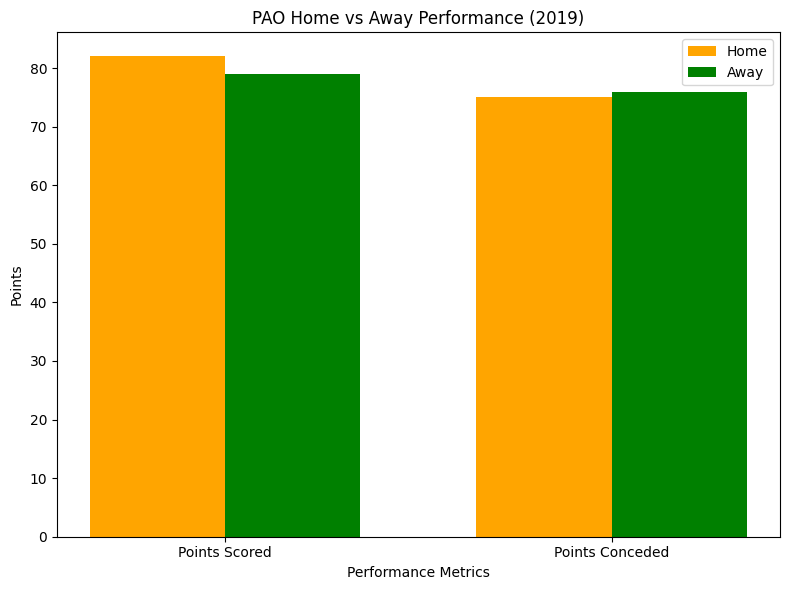

In [84]:
# Data for plotting (points scored and conceded at home and away in 2019)
labels = ['Points Scored', 'Points Conceded']
home_values = [home_avg_2019['HS'], home_avg_2019['AS']]
away_values = [away_avg_2019['HS'], away_avg_2019['AS']]

# Create grouped bar chart
x = np.arange(len(labels))  # label locations
bar_width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - bar_width/2, home_values, bar_width, label='Home', color='orange')
rects2 = ax.bar(x + bar_width/2, away_values, bar_width, label='Away', color='green')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Performance Metrics')
ax.set_ylabel('Points')
ax.set_title('PAO Home vs Away Performance (2019)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [103]:
# Filter the dataset for the year 2019
pao_2019_games = pao_games[pao_games['DATE'].dt.year == 2019]

# Calculating average points scored in each quarter for home games (2019), including Q4
home_games_2019 = pao_2019_games[pao_2019_games['HT'] == 'Panathinaikos']
home_quarter_scores_2019 = home_games_2019[['Q1H', 'Q2H', 'Q3H', 'Q4H']].mean().round(0)

# Calculating average points scored in each quarter for away games (2019), including Q4
away_games_2019 = pao_2019_games[pao_2019_games['AT'] == 'Panathinaikos']
away_quarter_scores_2019 = away_games_2019[['Q1A', 'Q2A', 'Q3A', 'Q4A']].mean().round(0)

# Displaying quarter-by-quarter performance for home and away games in 2019
print("PAO Home Games Quarter-by-Quarter Performance (2019):\n", home_quarter_scores_2019)
print("PAO Away Games Quarter-by-Quarter Performance (2019):\n", away_quarter_scores_2019)

PAO Home Games Quarter-by-Quarter Performance (2019):
 Q1H    25.0
Q2H    22.0
Q3H    15.0
Q4H    19.0
dtype: float64
PAO Away Games Quarter-by-Quarter Performance (2019):
 Q1A    18.0
Q2A    18.0
Q3A    19.0
Q4A    21.0
dtype: float64


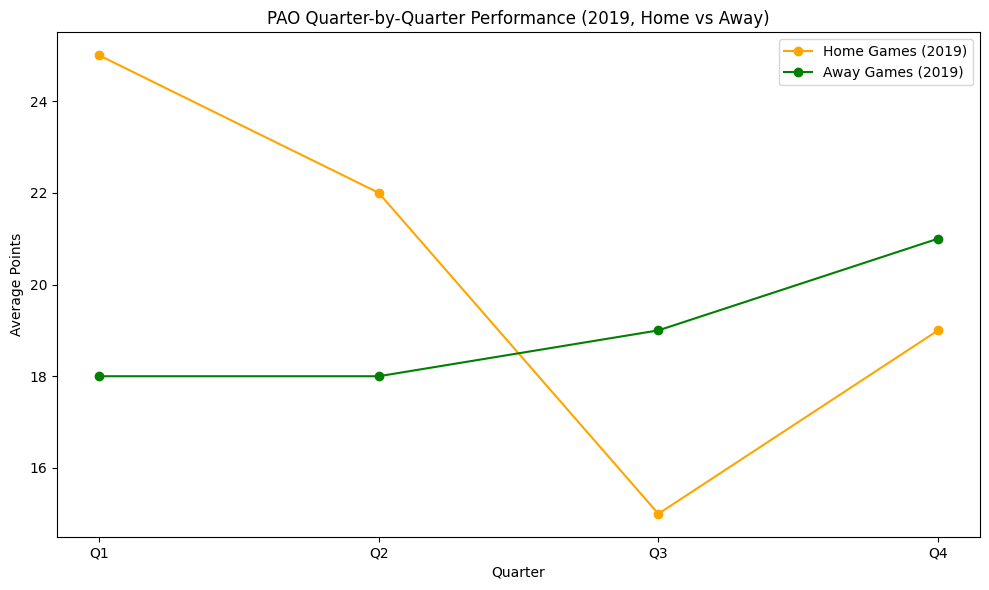

In [104]:
# Assuming home_quarter_scores_2019 and away_quarter_scores_2019 have Q1, Q2, Q3, and Q4 values
# If you haven't already calculated Q4, make sure the data for Q4 is included

# Line plot for quarter-by-quarter performance for 2019
plt.figure(figsize=(10, 6))

# Home games (2019)
plt.plot(['Q1', 'Q2', 'Q3', 'Q4'], home_quarter_scores_2019, marker='o', label='Home Games (2019)', color='orange')

# Away games (2019)
plt.plot(['Q1', 'Q2', 'Q3', 'Q4'], away_quarter_scores_2019, marker='o', label='Away Games (2019)', color='green')

# Labels and title
plt.title('PAO Quarter-by-Quarter Performance (2019, Home vs Away)')
plt.xlabel('Quarter')
plt.ylabel('Average Points')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

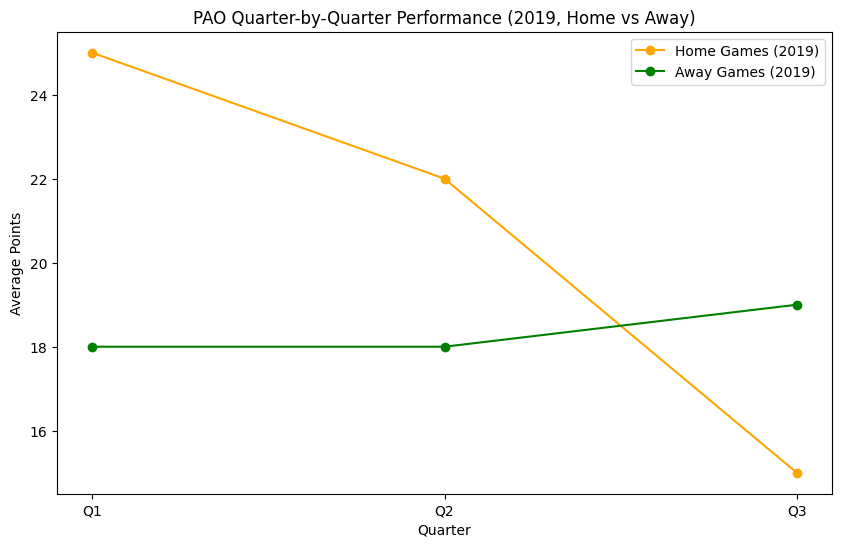

In [68]:
# Line plot for quarter-by-quarter performance for 2019
plt.figure(figsize=(10, 6))

# Home games (2019)
plt.plot(['Q1', 'Q2', 'Q3'], home_quarter_scores_2019, marker='o', label='Home Games (2019)', color='orange')

# Away games (2019)
plt.plot(['Q1', 'Q2', 'Q3'], away_quarter_scores_2019, marker='o', label='Away Games (2019)', color='green')

# Labels and title
plt.title('PAO Quarter-by-Quarter Performance (2019, Home vs Away)')
plt.xlabel('Quarter')
plt.ylabel('Average Points')
plt.legend()

# Show the plot
plt.show()

In [70]:
# PAO lost lead games and comebacks year 2019
#Filtering the dataset for the year 2019
pao_2019_games = pao_games[pao_games['DATE'].dt.year == 2019]

# Creating the 'pao_win' column for 2019
pao_2019_games.loc[:, 'pao_win'] = ((pao_2019_games['HT'] == 'Panathinaikos') & (pao_2019_games['HS'] > pao_2019_games['AS'])) | \
                                   ((pao_2019_games['AT'] == 'Panathinaikos') & (pao_2019_games['AS'] > pao_2019_games['HS']))

# Finding games where PAO had a lead after Q1 or Q2 but lost (for 2019)
lost_lead_games_2019 = pao_2019_games[((pao_2019_games['HT'] == 'Panathinaikos') & (pao_2019_games['Q1H'] > pao_2019_games['Q1A']) & (pao_2019_games['pao_win'] == False)) |
                                      ((pao_2019_games['AT'] == 'Panathinaikos') & (pao_2019_games['Q1A'] > pao_2019_games['Q1H']) & (pao_2019_games['pao_win'] == False)) |
                                      ((pao_2019_games['HT'] == 'Panathinaikos') & (pao_2019_games['Q2H'] > pao_2019_games['Q2A']) & (pao_2019_games['pao_win'] == False)) |
                                      ((pao_2019_games['AT'] == 'Panathinaikos') & (pao_2019_games['Q2A'] > pao_2019_games['Q2H']) & (pao_2019_games['pao_win'] == False))]

# Finding games where PAO made a comeback after trailing in Q1 or Q2 (for 2019)
comeback_games_2019 = pao_2019_games[((pao_2019_games['HT'] == 'Panathinaikos') & (pao_2019_games['Q1H'] < pao_2019_games['Q1A']) & (pao_2019_games['pao_win'] == True)) |
                                     ((pao_2019_games['AT'] == 'Panathinaikos') & (pao_2019_games['Q1A'] < pao_2019_games['Q1H']) & (pao_2019_games['pao_win'] == True)) |
                                     ((pao_2019_games['HT'] == 'Panathinaikos') & (pao_2019_games['Q2H'] < pao_2019_games['Q2A']) & (pao_2019_games['pao_win'] == True)) |
                                     ((pao_2019_games['AT'] == 'Panathinaikos') & (pao_2019_games['Q2A'] < pao_2019_games['Q2H']) & (pao_2019_games['pao_win'] == True))]

# Displaying lost lead games and comeback games in 2019
print("PAO Lost Lead Games (2019):\n", lost_lead_games_2019[['DATE', 'HT', 'AT', 'HS', 'AS', 'Q1H', 'Q1A', 'Q2H', 'Q2A']])
print("PAO Comeback Games (2019):\n", comeback_games_2019[['DATE', 'HT', 'AT', 'HS', 'AS', 'Q1H', 'Q1A', 'Q2H', 'Q2A']])

PAO Lost Lead Games (2019):
           DATE                HT             AT  HS  AS  Q1H  Q1A  Q2H  Q2A
10  2019-04-23     Panathinaikos    Real Madrid  82  89   18   23   23   13
12  2019-04-19       Real Madrid  Panathinaikos  78  63   21    8   14   18
35  2019-03-28     Panathinaikos    Real Madrid  73  74   32   14   13   19
106 2019-01-24  Maccabi Tel Aviv  Panathinaikos  84  75   16   17   24   18
110 2019-01-18   Zalgiris Kaunas  Panathinaikos  82  69   13   19   20   18
116 2019-01-11         Barcelona  Panathinaikos  79  68   17   13   20   23
PAO Comeback Games (2019):
          DATE              HT               AT  HS  AS  Q1H  Q1A  Q2H  Q2A
36 2019-03-22  Olimpia Milano    Panathinaikos  83  95   20   23   27   21
54 2019-03-15     CSKA Moscow    Panathinaikos  77  78   20   18   21   17
93 2019-02-01   Panathinaikos  Anadolu Efes SK  88  75   24   16   18   21


In [87]:
#PAO's lost lead games 2019(home)
# Extracting the data for each quarter to display the values directly
lost_lead_2019_quarters = lost_lead_2019[['Q1H', 'Q2H', 'Q3H', 'Q4H', 'HS']]

# Displaying the quarter-wise and final points data for lost lead games in 2019
print("PAO Lost Lead Games (2019 - Quarters):\n", lost_lead_2019_quarters.reset_index())

PAO Lost Lead Games (2019 - Quarters):
     DATE_ONLY  Q1H  Q2H  Q3H  Q4H  HS
0  2019-04-23   18   23   17   24  82
1  2019-04-19   21   14   26   17  78
2  2019-03-28   32   13   14   14  73
3  2019-01-24   16   24   22   22  84
4  2019-01-18   13   20   19   30  82
5  2019-01-11   17   20   19   23  79


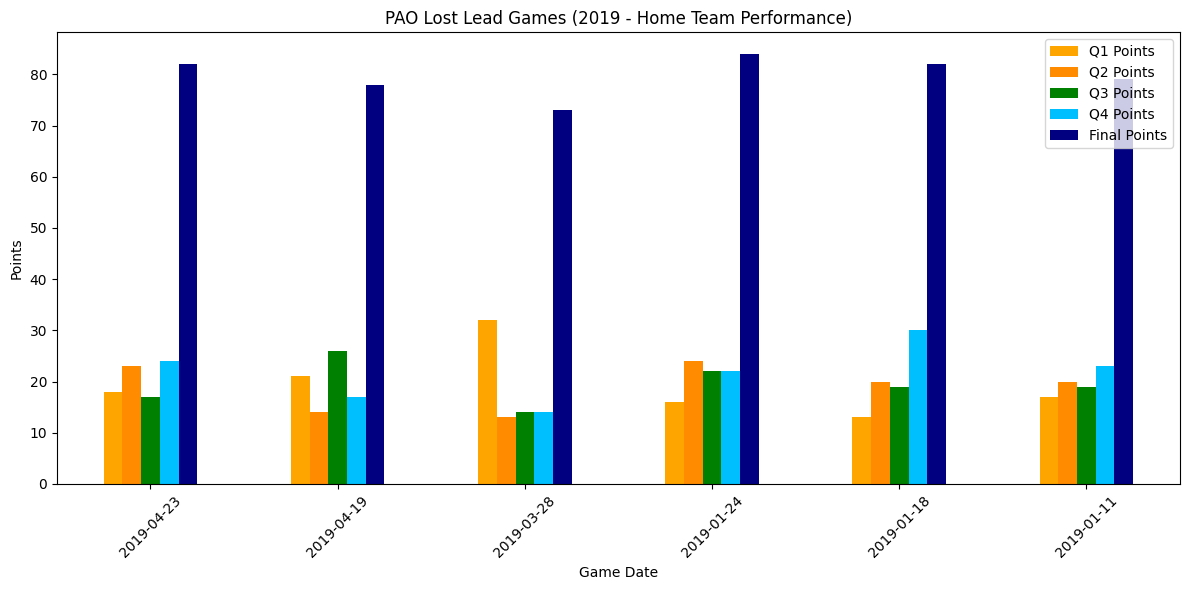

In [86]:
#Pao lost lead games 2019(home) visualisation
#Filtering lost lead games for the year 2019
lost_lead_2019 = lost_lead_games[lost_lead_games['DATE'].dt.year == 2019].copy()

# Convert 'DATE' to date-only (no time) and set it as the index
lost_lead_2019['DATE_ONLY'] = lost_lead_2019['DATE'].dt.date
lost_lead_2019.set_index('DATE_ONLY', inplace=True)

# Plot with all 4 quarters and final score
lost_lead_2019[['Q1H', 'Q2H', 'Q3H', 'Q4H', 'HS']].plot(kind='bar', figsize=(12, 6), color=['#FFA500', '#FF8C00', '#008000', '#00BFFF', '#000080'])
plt.title('PAO Lost Lead Games (2019 - Home Team Performance)')
plt.ylabel('Points')
plt.xlabel('Game Date')
plt.legend(['Q1 Points', 'Q2 Points', 'Q3 Points', 'Q4 Points', 'Final Points'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

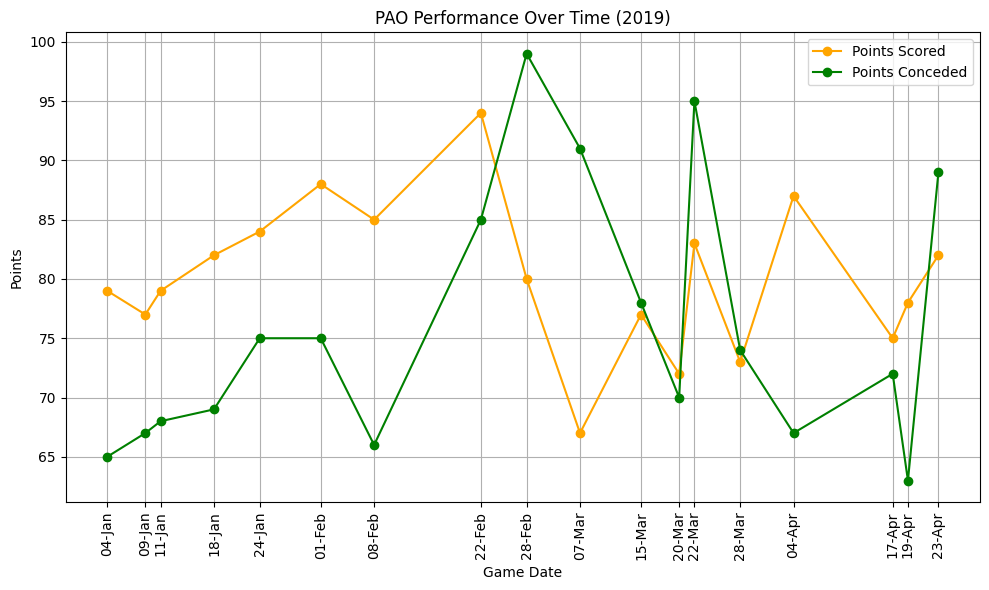

In [99]:
# Filter the dataset for the year 2019 to include only PAO's games
pao_2019_games_list = pao_games[pao_games['DATE'].dt.year == 2019]

# Points scored and conceded over time for 2019 (only on game dates)
plt.figure(figsize=(10, 6))

# Plot points scored and conceded for 2019 (only on PAO's game dates)
plt.plot(pao_2019_games_list['DATE'], pao_2019_games_list['HS'], label='Points Scored', color='orange', marker='o')
plt.plot(pao_2019_games_list['DATE'], pao_2019_games_list['AS'], label='Points Conceded', color='green', marker='o')

# Labels and title
plt.title('PAO Performance Over Time (2019)')
plt.xlabel('Game Date')
plt.ylabel('Points')
plt.legend()

# Ensure that all game dates are displayed on the x-axis
plt.gca().set_xticks(pao_2019_games_list['DATE'])

# Format x-axis to show only the game dates (date-month)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))

# Rotate x-axis labels vertically for better readability
plt.xticks(rotation=90)
plt.tight_layout()

# Add grid
plt.grid(True)

# Show the plot
plt.show()

In [80]:
#PAO's close games where score difference is ≤ 5.

# Filter the dataset for the year 2019
pao_2019_games = pao_games[pao_games['DATE'].dt.year == 2019]

# Use .loc[] to safely add the 'score_diff' column for 2019
pao_2019_games.loc[:, 'score_diff'] = abs(pao_2019_games['HS'] - pao_2019_games['AS'])

# Filter close games where the score difference is 5 points or fewer (2019)
close_games_2019 = pao_2019_games[pao_2019_games['score_diff'] <= 5]

# Display the close games in 2019
print("PAO Close Games (Score Difference ≤ 5) - 2019:\n", close_games_2019[['DATE', 'HT', 'AT', 'HS', 'AS', 'score_diff']])

PAO Close Games (Score Difference ≤ 5) - 2019:
          DATE             HT             AT  HS  AS  score_diff
16 2019-04-17    Real Madrid  Panathinaikos  75  72           3
35 2019-03-28  Panathinaikos    Real Madrid  73  74           1
46 2019-03-20  Panathinaikos       Baskonia  72  70           2
54 2019-03-15    CSKA Moscow  Panathinaikos  77  78           1


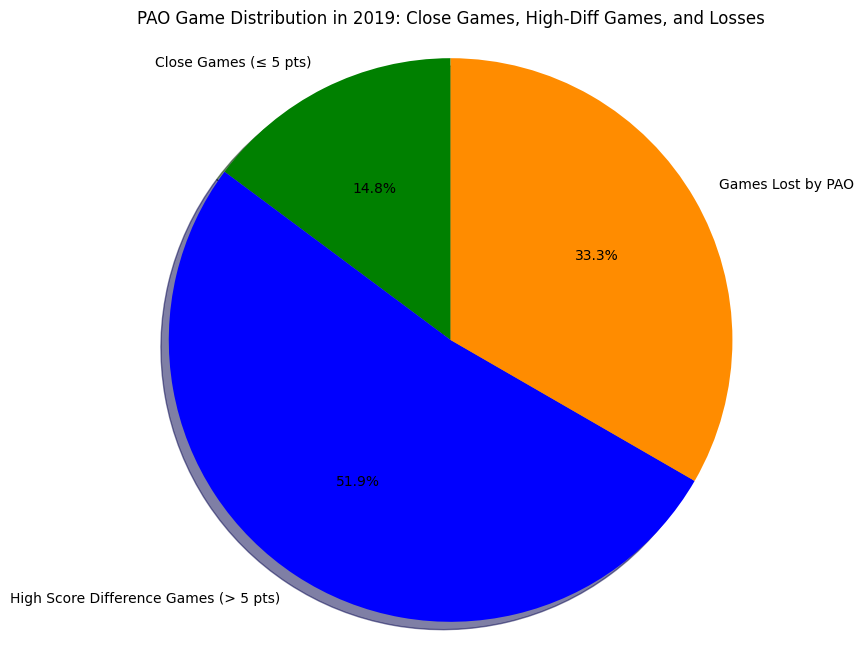

In [82]:
# Game distribution in 2019 (Close games, High difference games and losses)
#Filter for games in 2019
pao_2019_games = pao_games[pao_games['DATE'].dt.year == 2019]

# Total number of games played by PAO in 2019
total_games_2019 = len(pao_2019_games)

# Categorize the games for 2019
close_games_count_2019 = len(close_games_2019)  # Close games (score difference ≤ 5)
high_diff_games_count_2019 = total_games_2019 - close_games_count_2019  # Games with score difference > 5
lost_games_count_2019 = len(pao_2019_games[pao_2019_games['pao_win'] == False])  # Games PAO lost

# Labels and data for the pie chart (2019)
labels = ['Close Games (≤ 5 pts)', 'High Score Difference Games (> 5 pts)', 'Games Lost by PAO']
sizes = [close_games_count_2019, high_diff_games_count_2019, lost_games_count_2019]
colors = ['#008000', '#0000FF', '#FF8C00']  # Green for close games, Blue for high-diff games, Orange for losses

# Plotting the pie chart for 2019
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, shadow=True)
plt.title('PAO Game Distribution in 2019: Close Games, High-Diff Games, and Losses')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
plt.show()